In [97]:
# using Graphs, GraphIO

using DrWatson
quickactivate(@__DIR__)

using PolarizationFramework
using DifferentialEquations
using Plots
using Statistics
# using DataFrames

# file = datadir("windsurfers-interactions", "out.moreno_beach_beach")
# g = loadgraph(file, "graph_key", NETFormat())
# A = adjacency_matrix(g)

In [2]:
n = 9
g = 5
threshold = 0.5
vs = [@onlyif("attr_types" != "BA", 4), @onlyif("attr_types" == "OA", 1000), @onlyif("attr_types" == "BA", 2)]
attr_types = ["BA", "OA"]
gammas = [0.5, 1.5, 2.5, 4, 6]

larger_size = 5

5

In [3]:
all_params = @strdict(n, g, threshold, vs, attr_types, larger_size)
dicts = dict_list(all_params)

3-element Vector{Dict{String, Any}}:
 Dict("vs" => 4, "g" => 5, "threshold" => 0.5, "larger_size" => 5, "attr_types" => "OA", "n" => 9)
 Dict("vs" => 1000, "g" => 5, "threshold" => 0.5, "larger_size" => 5, "attr_types" => "OA", "n" => 9)
 Dict("vs" => 2, "g" => 5, "threshold" => 0.5, "larger_size" => 5, "attr_types" => "BA", "n" => 9)

In [4]:
ode_fun_name = "Heider7!"
ode_fun = getfield(PolarizationFramework, Symbol(ode_fun_name))
solver = AutoTsit5(Rodas5(autodiff = false))

maxtime = 1000.

1000.0

In [78]:
results = []

for params in dicts
    n, g, attr_type, v, larger_size = let
        @unpack n, g, threshold, attr_types, vs, larger_size = params
        n, g, attr_types, vs, larger_size
    end

    if attr_type == "UA"
        attr = UnorderedAttributes(g, threshold, v)
    elseif attr_type == "BA"
        attr = BinaryAttributes(g)
    elseif attr_type == "OA"
        attr = OrderedAttributes(g, threshold, v)
    elseif attr_type == "UPA"
        attr = UnorderedPositiveAttributes(g, threshold, v)
    else
        throw(attr_type)
    end

    for gamma1 in gammas
        rl_weights = init_random_balanced_relations(n, larger_size)
        initial_neg_links_count = larger_size * (n - larger_size)

        val0_attr = get_attributes(attr, n)
        al_weights = get_attribute_layer_weights(attr, val0_attr)

        (pos_destab, neg_destab) =
                        get_destabilized_links_count(rl_weights, al_weights, gamma1)
        
        print((pos_destab, neg_destab))

        if (pos_destab + neg_destab != 0)
            (ishb_sim_par, t, u, u0, xy_attr, sol) = calc_heider_attr(
                        n,
                        attr,
                        gamma1,
                        maxtime,
                        ode_fun,
                        solver,
                        true,
                        rl_weights,
                        al_weights
                    )
            
            triads_ts = [get_triad_counts(rl_cur_weights, n) for rl_cur_weights in sol.u]
            lp_ts = [get_local_polarization(deltas) for deltas in triads_ts]
            ts = sol.t
            # plot()
        else
            deltas = get_triad_counts(rl_weights, n)
            lp_ts = [get_local_polarization(deltas), ]
            ts = [0.]
        end

        push!(results, (attr_type, v, gamma1, ts, lp_ts))

        print(attr_type)
        print(gamma1)
    end
end

(0, 0)OA0.5(0, 1)OA1.5(0, 4)

OA2.5(3, 3)

OA4.0(1, 14)OA6.0(0, 0)OA0.5(0, 3)

OA1.5(0, 9)OA2.5(0, 16)OA4.0(0, 18)OA6.0(0, 0)BA0.5(1, 1)

BA1.5(3, 1)BA2.5(0, 0)BA4.0(9, 8)BA6.0

In [80]:
# name_dict = {"OA}
function get_title(dict)
    title = dict["attr_types"]
    if title == "OA"
        if dict["vs"] == 1000
            title = "CA"
        else
            title = title * ", v=" * string(dict["vs"])
        end
    end
    return title
end

get_title (generic function with 1 method)

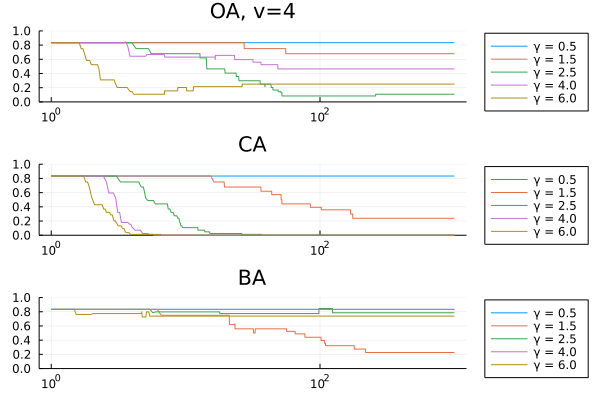

attempt to save state beyond implementation limit
attempt to save state beyond implementation limit


In [81]:
hs = [plot(title = get_title(dict)) for dict in dicts]
vs2 = [dict["vs"] for dict in dicts]

for result in results
    attr_type, v, gamma1, ts, lp_ts = result

    hs_ind = findfirst(vs2 .== v)
    h = hs[hs_ind]

    if ts[end] < maxtime
        push!(ts, maxtime)
        push!(lp_ts, lp_ts[end])
    end

    plot!(h, ts .+ 1, lp_ts, xaxis=:log10, label = "γ = " * string(gamma1)) 
    ylims!((0,1))
    if hs_ind >0 # == 2
        plot!(h, legend = :outertopright)
    else
        plot!(h, legend = false)
    end
end
# xlims!((0, 10))
# display(h)
plot(hs..., layout = (3,1))


In [75]:
results[1]

("OA", 4, 0.5, [0.0, 1000.0, 1000.0], [0.8333333333333334, 0.8333333333333334])

In [192]:
maxtime = 3000.
reps = 10

10

In [193]:
results = []
results_inds = Dict()
counter = 0

for params in dicts
    n, g, attr_type, v, larger_size = let
        @unpack n, g, threshold, attr_types, vs, larger_size = params
        n, g, attr_types, vs, larger_size
    end

    if attr_type == "UA"
        attr = UnorderedAttributes(g, threshold, v)
    elseif attr_type == "BA"
        attr = BinaryAttributes(g)
    elseif attr_type == "OA"
        attr = OrderedAttributes(g, threshold, v)
    elseif attr_type == "UPA"
        attr = UnorderedPositiveAttributes(g, threshold, v)
    else
        throw(attr_type)
    end

    for gamma1 in gammas
        for _ in 1:reps
            counter += 1

            rl_weights = init_random_balanced_relations(n, larger_size)
            initial_neg_links_count = larger_size * (n - larger_size)

            val0_attr = get_attributes(attr, n)
            al_weights = get_attribute_layer_weights(attr, val0_attr)

            (pos_destab, neg_destab) =
                            get_destabilized_links_count(rl_weights, al_weights, gamma1)
            
            # print((pos_destab, neg_destab))

            if (pos_destab + neg_destab != 0)
                (ishb_sim_par, t, u, u0, xy_attr, sol) = calc_heider_attr(
                            n,
                            attr,
                            gamma1,
                            maxtime,
                            ode_fun,
                            solver,
                            true,
                            rl_weights,
                            al_weights
                        )
                
                triads_ts = [get_triad_counts(rl_cur_weights, n) for rl_cur_weights in sol.u]
                lp_ts = [get_local_polarization(deltas) for deltas in triads_ts]
                ts = sol.t
                # plot()
            else
                deltas = get_triad_counts(rl_weights, n)
                lp_ts = [get_local_polarization(deltas), ]
                ts = [0.]
            end

            push!(results, (attr_type, v, gamma1, ts, lp_ts))
            
            if !haskey(results_inds, (attr_type, v, gamma1))
                results_inds[(attr_type, v, gamma1)] = [counter]
            else
                push!(results_inds[(attr_type, v, gamma1)], counter)
            end
            
        end
        print(attr_type)
        print(gamma1)
    end
end

OA0.5

OA1.5

OA2.5

OA4.0

OA6.0OA0.5

OA1.5OA2.5

OA4.0

OA6.0BA0.5

BA1.5

BA2.5BA4.0

BA6.0

In [164]:
"""
Using simple approximation it calculates value of y in x given ys(xs). 
It is assumed that xs are sorted. 
"""
function get_x(x, xs, ys)
    ind = findfirst(x .<= xs)
    
    if isnothing(ind) 
        return ys[end]
    elseif xs[ind] == x
        return ys[ind]
    else

        a = (ys[ind] - ys[ind-1]) / (xs[ind] - xs[ind-1]) 
        y = a * (x - xs[ind-1]) + ys[ind-1]
        return y
    end
end

"""
xss and yss are arrays of different lengths. 
"""
function average_curves(xss, yss)
    xs = sort(unique(collect(Iterators.flatten(xss))))
    ys = zeros(length(xs))
    ystds = zeros(length(xs))
    for (i, x) in enumerate(xs)
        vals = [get_x(x, xs1, ys1) for (xs1, ys1) in zip(xss, yss)]
        ys[i] = mean(vals)
        ystds[i] = std(vals)
    end
    return xs, ys, ystds
end

average_curves

In [194]:
results_mean = []

# results = []
# results_inds = Dict()
# counter = 0

for params in dicts
    n, g, attr_type, v, larger_size = let
        @unpack n, g, threshold, attr_types, vs, larger_size = params
        n, g, attr_types, vs, larger_size
    end

    if attr_type == "UA"
        attr = UnorderedAttributes(g, threshold, v)
    elseif attr_type == "BA"
        attr = BinaryAttributes(g)
    elseif attr_type == "OA"
        attr = OrderedAttributes(g, threshold, v)
    elseif attr_type == "UPA"
        attr = UnorderedPositiveAttributes(g, threshold, v)
    else
        throw(attr_type)
    end

    for gamma1 in gammas
        inds = results_inds[(attr_type, v, gamma1)]

        xss = [result[4] for result in results[inds]]
        yss = [result[5] for result in results[inds]]

        ts, ys, ystds = average_curves(xss, yss)
            
        push!(results_mean, (attr_type, v, gamma1, ts, ys, ystds))
            
        print(attr_type)
        print(gamma1)
    end
end

OA0.5

OA1.5

OA2.5

OA4.0

OA6.0OA0.5

OA1.5OA2.5

OA4.0

OA6.0BA0.5

BA1.5

BA2.5BA4.0BA6.0

In [198]:
hs = [plot(title = get_title(dict), xticks = [1, 10, 100, 1000]) for dict in dicts]
vs2 = [dict["vs"] for dict in dicts]

for result in results_mean
    attr_type, v, gamma1, ts, lp_ts, lp_ts_std = result

    hs_ind = findfirst(vs2 .== v)
    h = hs[hs_ind]

    if ts[end] < maxtime
        push!(ts, maxtime)
        push!(lp_ts, lp_ts[end])
        push!(lp_ts_std, lp_ts_std[end])
    end

    plot!(h, ts .+ 1, lp_ts, ribbon=lp_ts_std,fillalpha=.5, xaxis=:log10, label = "γ = " * string(gamma1)) 
    ylims!((0,1))
    # xticks!((1, 10, 100, 1000))
    if hs_ind == 3
        plot!(h, legend = :bottom)
    else
        plot!(h, legend = false)
    end

    if hs_ind == 3
        ylabel!("Local Polarization")
    elseif hs_ind == 1
        xlabel!("Time moved by 1, t-1")
    end
end
# xlims!((0, 10))
# display(h)
p = plot(hs[3], hs[1], hs[2], layout = (1,3), link=:both)

savefig(p, savename(projectdir("plots/"), (N=9, G=5), "pdf"))#, width=8*300, height=11*300)


┌ Warning: Path separators in `savename` prefixes may break reproducibility on other OS. The recommended way is using the `*dir()` methods or `joinpath` with `savename` (e.g. `datadir("path", "to", "folder", savename("prefix", data))`).
└ @ DrWatson /home/pgorski/.julia/packages/DrWatson/S4dYA/src/naming.jl:94


In [197]:
savename(projectdir("plots/"), (N=9, G=5), "pdf")

┌ Warning: Path separators in `savename` prefixes may break reproducibility on other OS. The recommended way is using the `*dir()` methods or `joinpath` with `savename` (e.g. `datadir("path", "to", "folder", savename("prefix", data))`).
└ @ DrWatson /home/pgorski/.julia/packages/DrWatson/S4dYA/src/naming.jl:94


"/home/pgorski/Desktop/programming/curheider/PolarizationFramework/plots/G=5_N=9.pdf"

In [124]:
average_curves(xss, yss)

BoundsError: BoundsError: attempt to access 28817-element Vector{Float64} at index [28818]

In [146]:
xs = sort(unique(collect(Iterators.flatten(xss))))
ys = zeros(length(xs))
ystds = zeros(length(xs))
xs

96818-element Vector{Float64}:
    0.0
    0.031658164048645576
    0.03335576886060903
    0.03452998724947486
    0.03485673917904486
    0.034921476698739747
    0.035216206277672316
    0.03568279115739996
    0.03602117855740615
    0.03616856301299422
    ⋮
  999.8689996753967
  999.8925803948946
  999.8951997403174
  999.9140643159157
  999.9161597922539
  999.9312514527326
  999.9329278338031
  999.9463422670425
 1000.0

In [153]:
x = xs[end-1]
vals = [get_x(x, xs1, ys1) for (xs1, ys1) in zip(xss, yss)]

BoundsError: BoundsError: attempt to access 28817-element Vector{Float64} at index [28818]

In [147]:
for (i, x) in enumerate(xs)
    vals = [get_x(x, xs1, ys1) for (xs1, ys1) in zip(xss, yss)]
    ys[i] = mean(vals)
    ystds[i] = std(vals)
end

BoundsError: BoundsError: attempt to access 28817-element Vector{Float64} at index [28818]

In [154]:
xs

96818-element Vector{Float64}:
    0.0
    0.031658164048645576
    0.03335576886060903
    0.03452998724947486
    0.03485673917904486
    0.034921476698739747
    0.035216206277672316
    0.03568279115739996
    0.03602117855740615
    0.03616856301299422
    ⋮
  999.8689996753967
  999.8925803948946
  999.8951997403174
  999.9140643159157
  999.9161597922539
  999.9312514527326
  999.9329278338031
  999.9463422670425
 1000.0

In [159]:
get_x(x, xss[8], yss[8])

BoundsError: BoundsError: attempt to access 28817-element Vector{Float64} at index [28818]

In [161]:
findfirst(x .<= xss[8])

28817

In [162]:
xss[8][28817]

1000.0

In [163]:
x, xss[8][28816:end]

(999.9463422670425, [999.9312514527326, 1000.0])

In [33]:
triads[25:end]

21-element Vector{Any}:
 (3, 4, 14)
 (3, 9, 33)
 (6, 7, 17)
 (9, 31, 33)
 (9, 31, 34)
 (9, 33, 34)
 (15, 33, 34)
 (16, 33, 34)
 (19, 33, 34)
 (21, 33, 34)
 (23, 33, 34)
 (24, 28, 34)
 (24, 30, 33)
 (24, 30, 34)
 (24, 33, 34)
 (25, 26, 32)
 (27, 30, 34)
 (29, 32, 34)
 (30, 33, 34)
 (31, 33, 34)
 (32, 33, 34)

In [27]:
sum([7 in triad for triad in triads])

3

In [22]:
triangles(g)[[6,7,17,27,30,34,29,32]]

8-element Vector{Int64}:
  3
  3
  1
  1
  4
 15
  1
  3

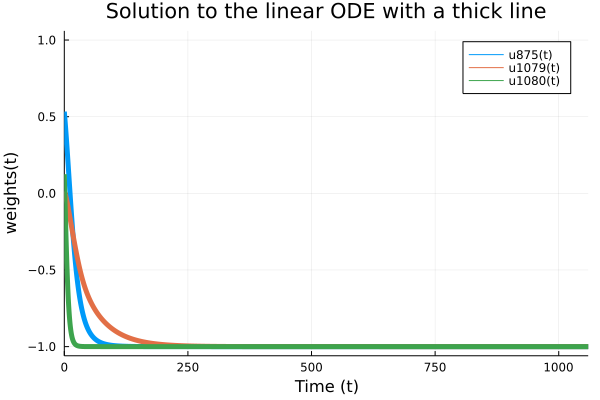

In [110]:
mask2 = zeros(Bool, size(mask))
mask2[25,26] = 1
mask2[25,32] = 1
mask2[26,32] = 1

h = plot(
            sol,
            linewidth = 5,
            title = "Solution to the linear ODE with a thick line",
            xaxis = "Time (t)",
            yaxis = "weights(t)",
            ylim = [-1, +1],
            vars = reshape(1:n^2, n, n)[mask2],
        )

In [98]:
reshape(1:n^2, n, n)[mask2]

LoadError: BoundsError: attempt to access 34×34 reshape(::UnitRange{Int64}, 34, 34) with eltype Int64 at index [[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]]

In [10]:
using LinearAlgebra
triangles(Graph(Symmetric(A2)))

34-element Vector{Int64}:
 18
 12
 11
 10
  2
  3
  3
  6
  5
  0
  2
  0
  1
  ⋮
  1
  4
  1
  1
  1
  1
  1
  4
  3
  3
 13
 15